In [1]:
# Helper functions to prepare dataset
from utils import read_and_clean_data, split_X_y
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read and clean data
dataset = read_and_clean_data("../data/ABBREV.xlsx")

# Split dataset into X and y
X, y = split_X_y(dataset)

# Multivariate Linear Regression

## Visualization

In [3]:
dataset.corr()

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct
Water_(g),1.000000,-0.900477,-0.103997,-0.489789,-0.258167,-0.773640,-0.384817,-0.460326,-0.241643,-0.349056,...,-0.057486,-0.057446,0.020197,-0.364246,-0.384590,-0.396220,0.055404,0.408611,0.124231,0.144236
Energ_Kcal,-0.900477,1.000000,0.112636,0.806677,0.101501,0.493028,0.200877,0.317323,0.128518,0.196426,...,0.074981,0.074914,-0.023663,0.616267,0.672222,0.592299,0.014996,-0.400847,-0.086000,-0.086311
Protein_(g),-0.103997,0.112636,1.000000,0.062336,0.099524,-0.304295,-0.075586,-0.270995,0.044046,0.126090,...,0.018185,0.018243,-0.072357,0.047322,0.081447,-0.046130,0.289623,-0.151361,0.159852,0.332011
Lipid_Tot_(g),-0.489789,0.806677,0.062336,1.000000,0.000866,-0.048594,-0.024221,-0.000652,0.018452,-0.035479,...,0.073140,0.073059,0.015280,0.763921,0.868602,0.702777,0.087108,-0.262672,-0.021610,0.001700
Ash_(g),-0.258167,0.101501,0.099524,0.000866,1.000000,0.142744,0.184340,0.021103,0.475621,0.199717,...,0.021093,0.021145,0.060570,-0.018788,-0.001361,0.028165,-0.011104,-0.144975,-0.052423,-0.077112
Carbohydrt_(g),-0.773640,0.493028,-0.304295,-0.048594,0.142744,1.000000,0.455979,0.620721,0.193420,0.344961,...,0.014612,0.014592,-0.010829,-0.045936,-0.098518,0.054300,-0.219579,-0.230001,-0.179333,-0.276864
Fiber_TD_(g),-0.384817,0.200877,-0.075586,-0.024221,0.184340,0.455979,1.000000,0.103948,0.234153,0.381412,...,-0.012577,-0.012548,0.154971,-0.078208,-0.032293,0.073481,-0.147348,-0.083296,-0.123968,-0.129099
Sugar_Tot_(g),-0.460326,0.317323,-0.270995,-0.000652,0.021103,0.620721,0.103948,1.000000,0.129262,0.115235,...,0.053461,0.053372,-0.019254,0.066748,-0.062988,-0.005658,-0.133988,-0.160004,-0.109672,-0.173053
Calcium_(mg),-0.241643,0.128518,0.044046,0.018452,0.475621,0.193420,0.234153,0.129262,1.000000,0.351655,...,0.066972,0.067003,0.171007,0.035454,-0.008462,0.012372,-0.038678,-0.114076,-0.077259,-0.103971
Iron_(mg),-0.349056,0.196426,0.126090,-0.035479,0.199717,0.344961,0.381412,0.115235,0.351655,1.000000,...,0.080204,0.080425,0.175475,-0.053459,-0.038277,0.001373,0.004846,-0.189585,-0.065340,-0.073666


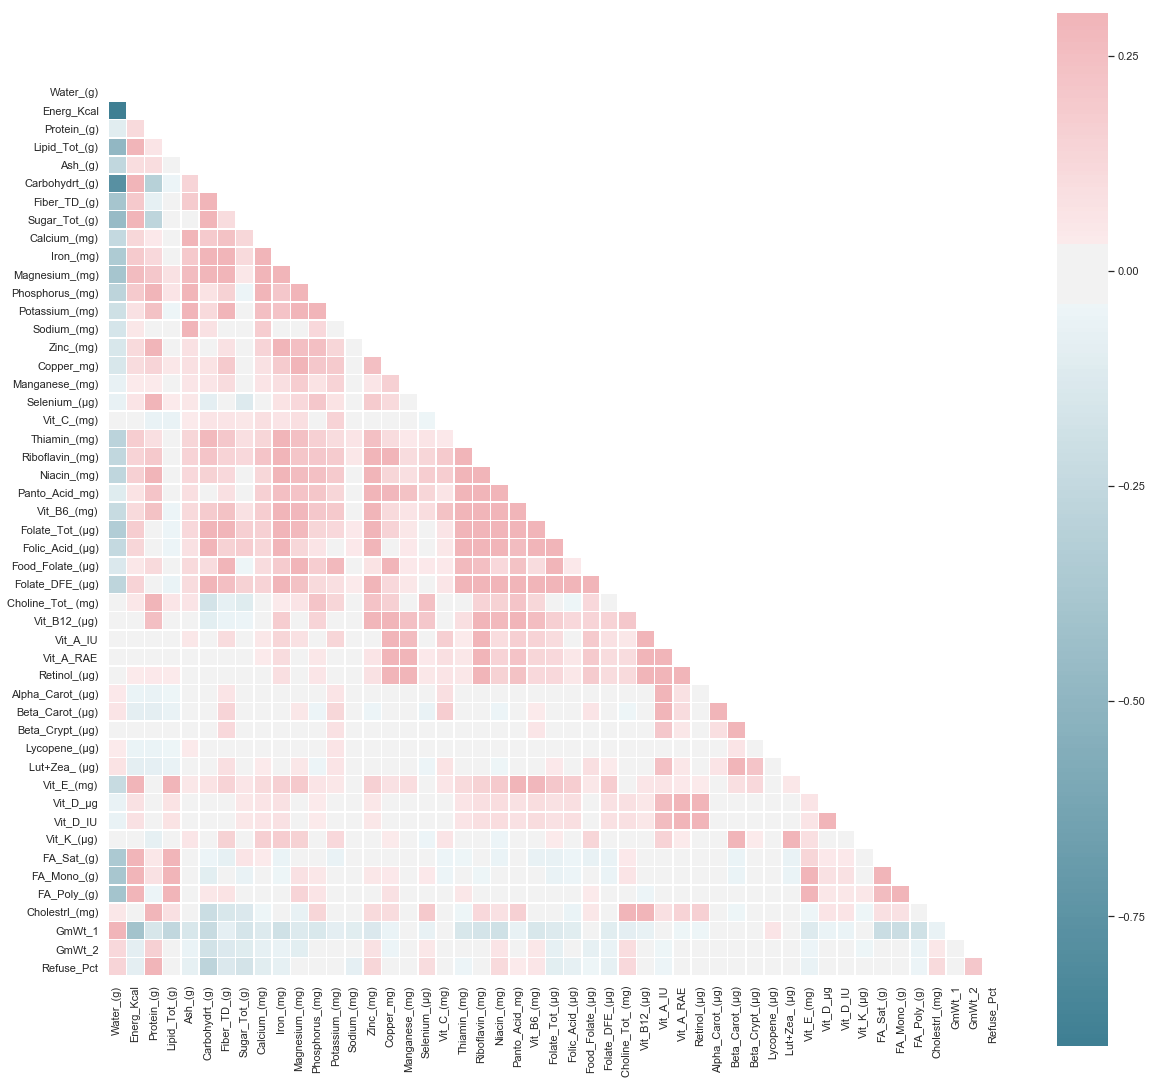

In [4]:
import seaborn as sns
sns.set(style="white")
corr = dataset.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 19))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

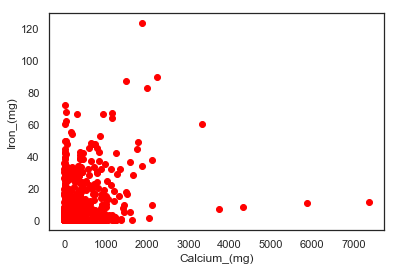

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(dataset['Calcium_(mg)'], dataset['Iron_(mg)'], c='red')
plt.xlabel('Calcium_(mg)')
plt.ylabel('Iron_(mg)')
plt.show()

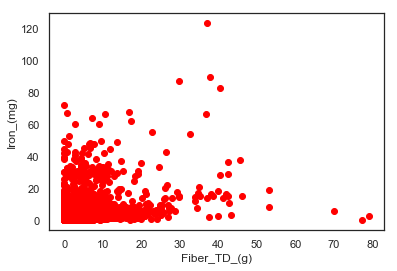

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(dataset['Fiber_TD_(g)'], dataset['Iron_(mg)'], c='red')
plt.xlabel('Fiber_TD_(g)')
plt.ylabel('Iron_(mg)')
plt.show()

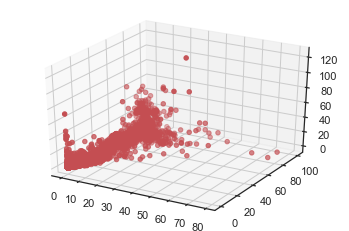

In [7]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(dataset['Fiber_TD_(g)'], dataset['Carbohydrt_(g)'], dataset['Iron_(mg)'], c="r", cmap='Greens')

# Train Test Split and Scaling

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [9]:
from sklearn.preprocessing import RobustScaler

scl_X = RobustScaler().fit(X_train)
scl_y = RobustScaler().fit(y_train)

input_x_train = scl_X.transform(X_train)
input_y_train = scl_y.transform(y_train)

input_x_test = scl_X.transform(X_test)
input_y_test = scl_y.transform(y_test)

# Fit Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

In [11]:
linreg = MultiOutputRegressor(LinearRegression())
linreg.fit(input_x_train, input_y_train)

MultiOutputRegressor(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
           n_jobs=None)

In [12]:
linreg.score(input_x_train, input_y_train)

0.573174462024907

In [13]:
linreg.score(input_x_test, input_y_test)

-0.09221031104148876

# Fit Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

In [18]:
RF = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_features="sqrt"))
RF.fit(input_x_train, input_y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
           n_jobs=None)

In [19]:
RF.score(input_x_train, input_y_train)

0.9383533033650182

In [20]:
RF.score(input_x_test, input_y_test)

0.5819881876937864